# Extract hovering data

In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="darkgrid")

# Logs

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-59-14].csv
Dropping 4 rows with datetime errors.


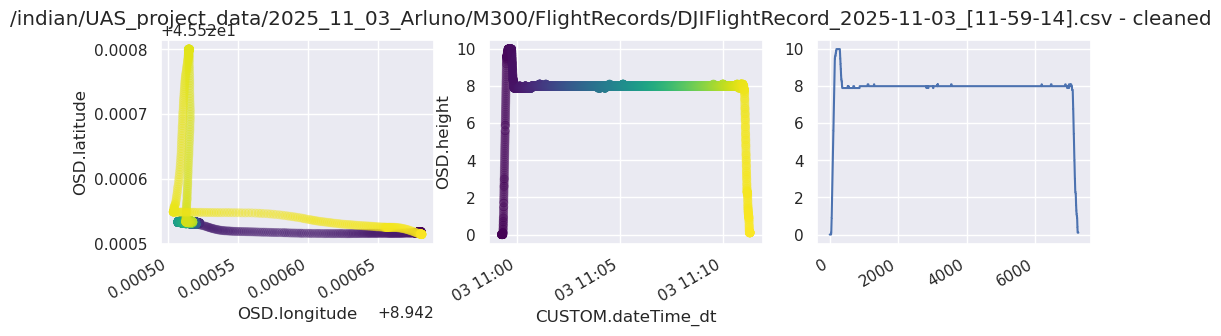

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-19-42].csv
Dropping 3 rows with datetime errors.


/tmp/ipykernel_197158/1895328341.py:19: DtypeWarning: Columns (19,114) have mixed types. Specify dtype option on import or set low_memory=False.
  fr_df = pd.read_csv(filename)


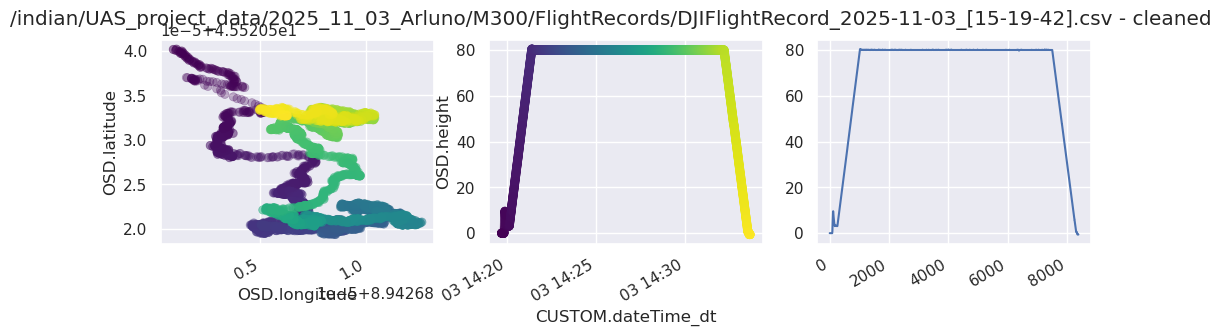

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[14-34-32].csv
Dropping 2 rows with datetime errors.


/tmp/ipykernel_197158/1895328341.py:19: DtypeWarning: Columns (19,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  fr_df = pd.read_csv(filename)


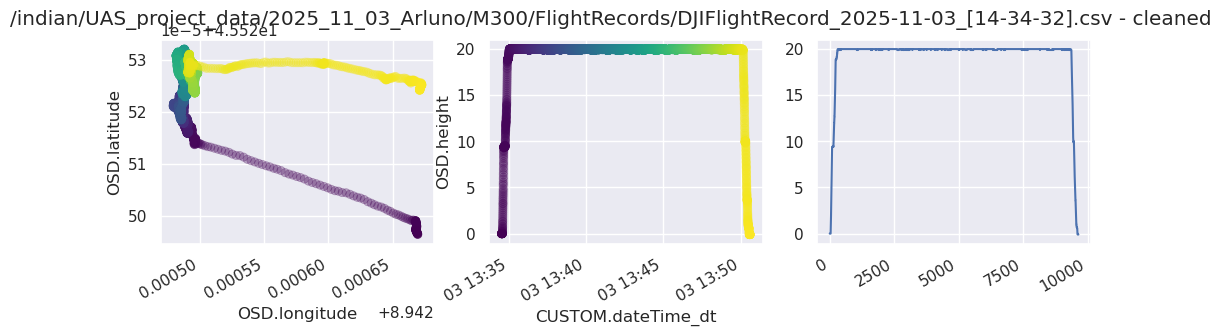

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-01-14].csv
Dropping 1 rows with datetime errors.


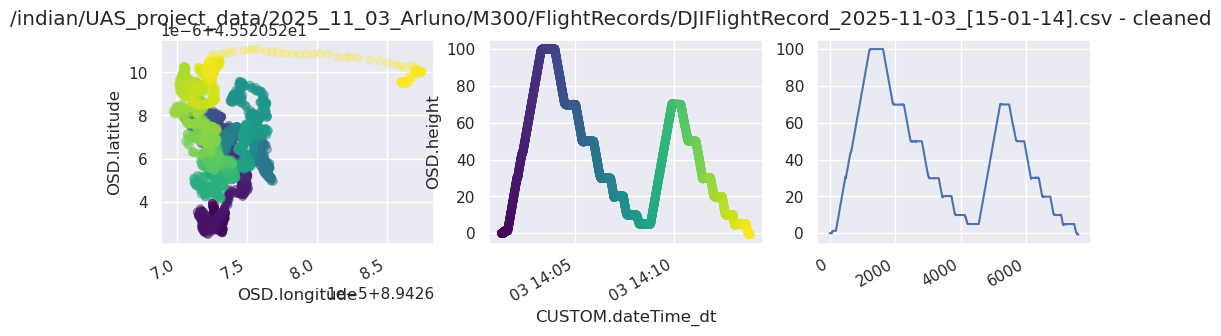

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-46-35].csv
Dropping 3 rows with datetime errors.


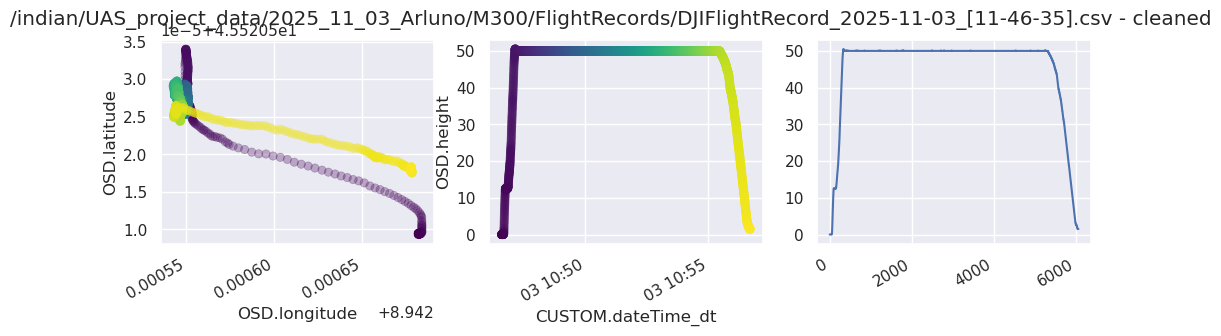

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-46-24].csv
Dropping 1 rows with datetime errors.


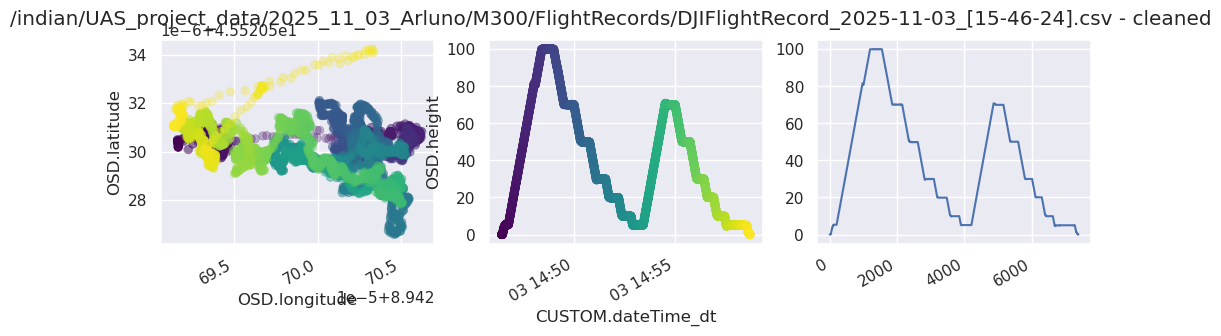

/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-37-37].csv
Dropping 2 rows with datetime errors.


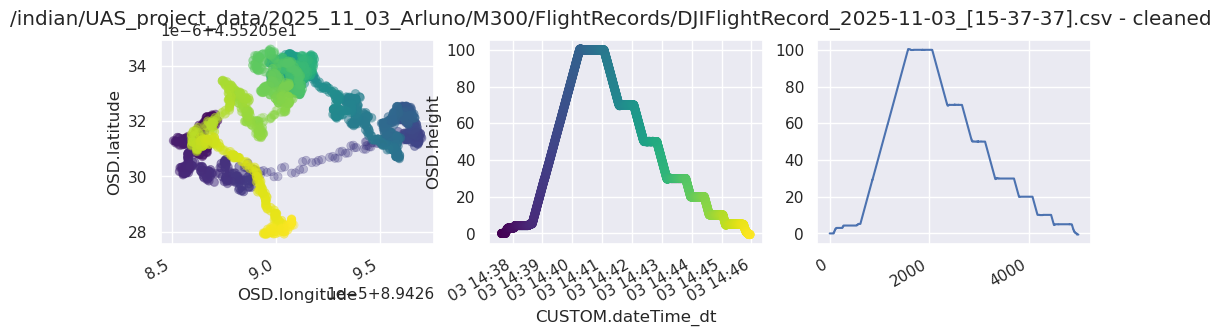

In [3]:
filenames = [
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-59-14].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-19-42].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[14-34-32].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-01-14].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[11-46-35].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-46-24].csv',
    '/indian/UAS_project_data/2025_11_03_Arluno/M300/FlightRecords/DJIFlightRecord_2025-11-03_[15-37-37].csv',
    ]

intervals = {
}

for filename in filenames:
    if filename[-3:] != 'csv': continue

    print(filename)

    fr_df = pd.read_csv(filename)

    # Convert to datetime
    fr_df['CUSTOM.dateTime_dt'] = pd.to_datetime(fr_df['CUSTOM.dateTime'], format='ISO8601',utc=True)
    fr_df['CUSTOM.dateTime_dt']

    # Filter sampling errors.
    median_time = fr_df['CUSTOM.dateTime_dt'].median()
    i_to_drop = fr_df.loc[(fr_df['CUSTOM.dateTime_dt'] > median_time+pd.Timedelta(1,'day')) | (fr_df['CUSTOM.dateTime_dt'] < median_time-pd.Timedelta(1,'day'))].index
    print(f"Dropping {len(i_to_drop)} rows with datetime errors.")
    fr_df.drop(axis=0, index=i_to_drop,inplace=True)


    # Plot trajectory
    fig,axes=plt.subplots(1,3,figsize=(12,3))
    fig.suptitle(f"{filename} - cleaned")

    sns.scatterplot(
            data=fr_df,
            x='OSD.longitude',
            y='OSD.latitude',
            hue='CUSTOM.dateTime_dt',
            legend=False,
            ax=axes[0],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
        )

    sns.scatterplot(
            data=fr_df,
            x='CUSTOM.dateTime_dt',
            y='OSD.height',
            hue='CUSTOM.dateTime_dt',
            legend=False,
            ax=axes[1],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',    
        )

    axes[2].plot(
            fr_df['OSD.height'],
        )


    fig.autofmt_xdate(rotation=30, ha='right')

    plt.show()


# Trisonica

/tmp/ipykernel_197158/2921859028.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


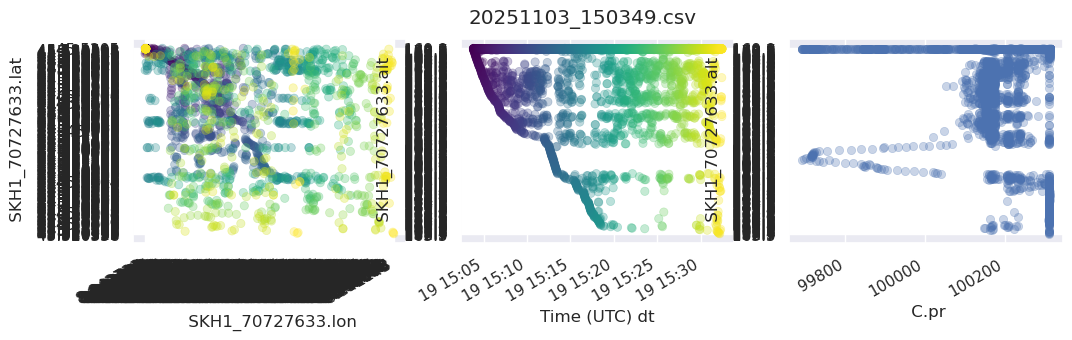

/tmp/ipykernel_197158/2921859028.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


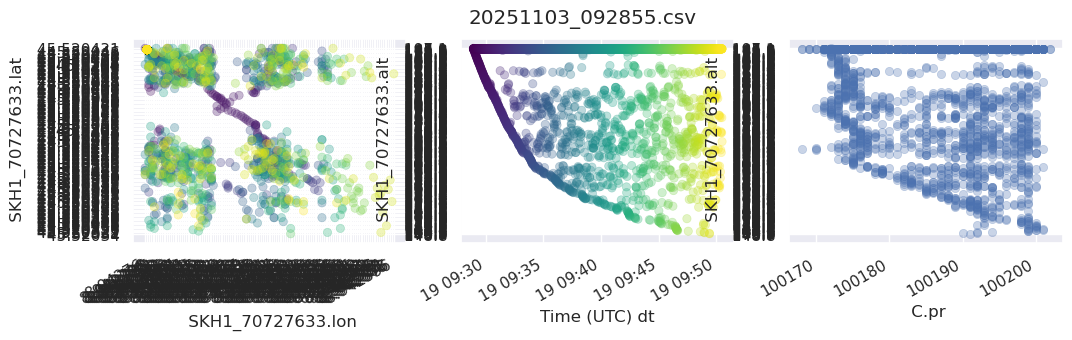

/tmp/ipykernel_197158/2921859028.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


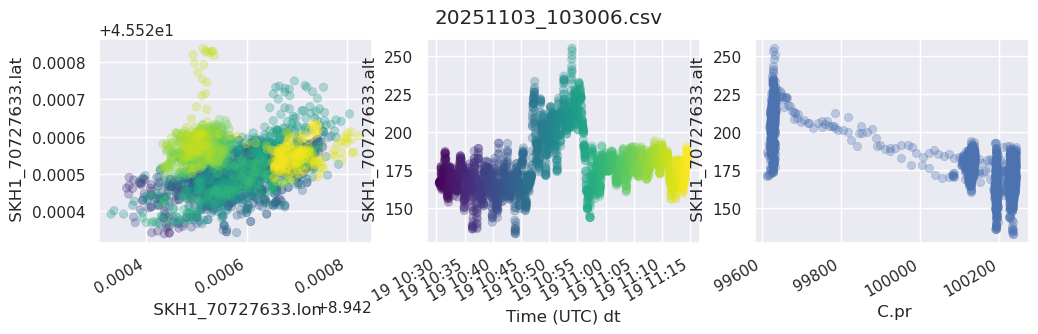

/tmp/ipykernel_197158/2921859028.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


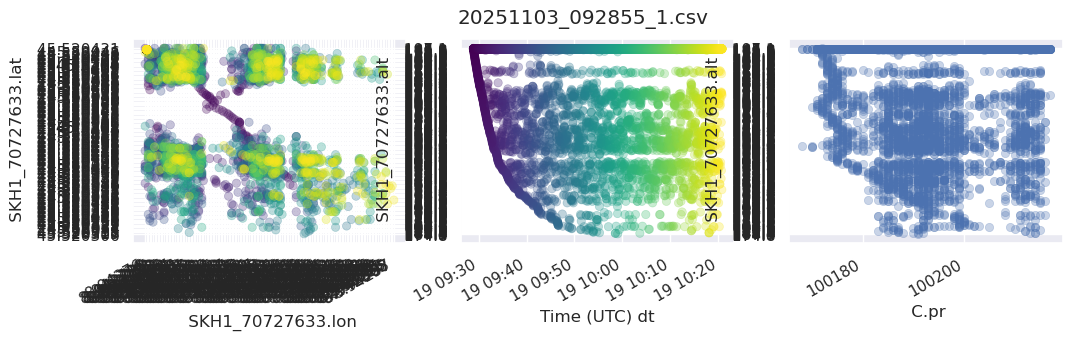

/tmp/ipykernel_197158/2921859028.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


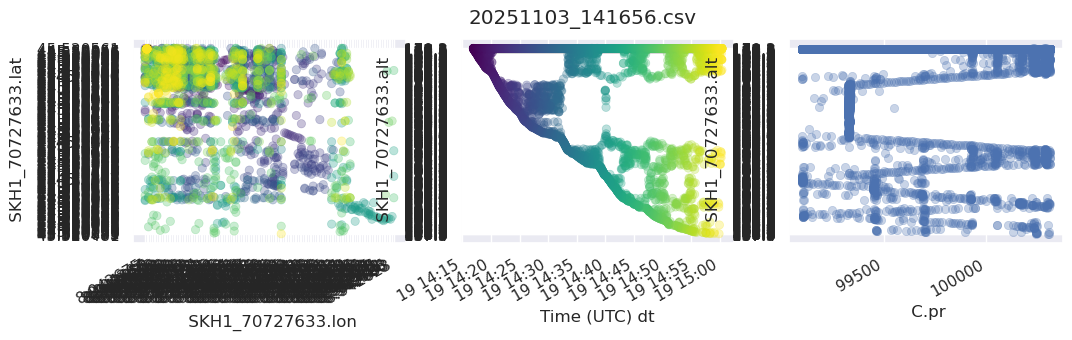

/tmp/ipykernel_197158/2921859028.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


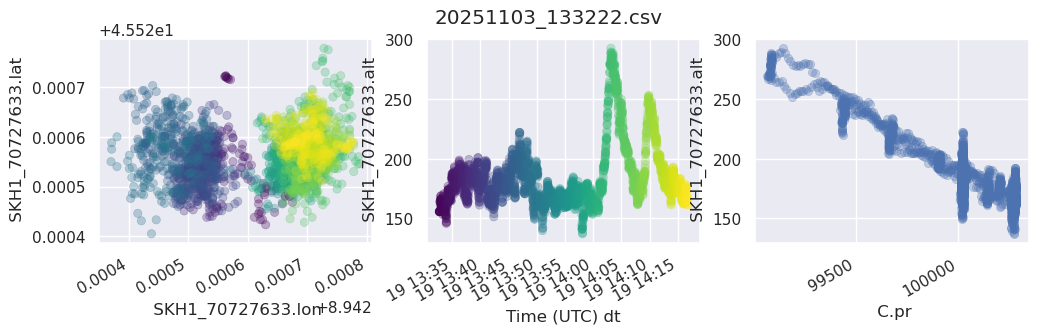

In [4]:
tris_folder = "/indian/UAS_project_data/2025_11_03_Arluno/trisonica"

for tris_file in os.listdir(tris_folder):
    tris_df = pd.read_csv(os.path.join(tris_folder,tris_file),sep=';',header=8)
    
    tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])

    fig,axes=plt.subplots(1,3,figsize=(12,3))
    fig.suptitle(f"{tris_file}")

    sns.scatterplot(
            data=tris_df,
            x=' SKH1_70727633.lon',
            y=' SKH1_70727633.lat',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[0],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
        )

    sns.scatterplot(
            data=tris_df,
            x='Time (UTC) dt',
            y=' SKH1_70727633.alt',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[1],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',    
        )

    sns.scatterplot(
            data=tris_df,
            x=' C.pr',
            y=' SKH1_70727633.alt',
            legend=False,
            ax=axes[2],
            edgecolor=None,
            alpha=0.3,
        )

    fig.autofmt_xdate(rotation=30, ha='right')

    plt.show()

In [5]:
tris_df

,Time (UTC),SKH1_70727633.pr,SKH1_70727633.bat,SKH1_70727633.temp,SKH1_70727633.rh,C.wspd,C.wdir,C.windU,C.windV,C.windW,C.temp,C.rh,C.pr,C.pitch,C.roll,C.heading,SKH1_70727633.lat,SKH1_70727633.lon,SKH1_70727633.alt,Time (UTC) dt
0,13:32:22.171,100067,7.809,19.89,50.23,0.61,233,0.47,0.36,0.12,16.87,73.2,100261,5.2,-1.3,0,NaN,NaN,NaN,2025-11-19 13:32:22.171
1,13:32:22.343,,,,,0.53,250,0.50,0.18,-0.02,17.00,72.5,100260,5.3,-1.4,0,NaN,NaN,NaN,2025-11-19 13:32:22.343
2,13:32:22.541,,,,,0.66,241,0.58,0.32,0.02,16.82,73.4,100259,4.7,-0.9,0,NaN,NaN,NaN,2025-11-19 13:32:22.541
3,13:32:22.743,,,,,0.64,260,0.63,0.11,0.08,17.08,72.2,100260,4.8,-1.2,0,NaN,NaN,NaN,2025-11-19 13:32:22.743
4,13:32:22.941,100067,7.721,19.92,50.25,0.60,262,0.59,0.09,0.03,16.97,72.8,100259,5.0,-1.3,0,NaN,NaN,NaN,2025-11-19 13:32:22.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13329,14:16:48.557,,,,,0.25,304,0.21,-0.14,-0.04,17.43,60.8,100283,2.5,-0.1,0,NaN,NaN,NaN,2025-11-19 14:16:48.557
13330,14:16:48.734,100089,7.711,19.87,51.13,0.20,298,0.18,-0.09,-0.03,18.23,57.8,100283,2.9,0.6,0,45.52058,8.942663,161.1,2025-11-19 14:16:48.734
13331,14:16:48.933,,,,,0.13,330,0.06,-0.10,-0.06,18.56,56.6,100282,2.3,0.2,0,NaN,NaN,NaN,2025-11-19 14:16:48.933
13332,14:16:49.138,,,,,0.07,215,0.04,0.05,-0.03,17.89,59.1,100282,2.3,0.1,0,NaN,NaN,NaN,2025-11-19 14:16:49.138


/tmp/ipykernel_197158/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


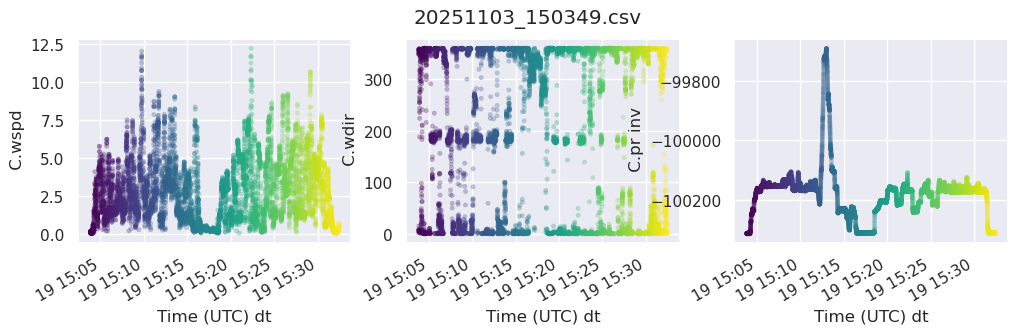

/tmp/ipykernel_197158/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


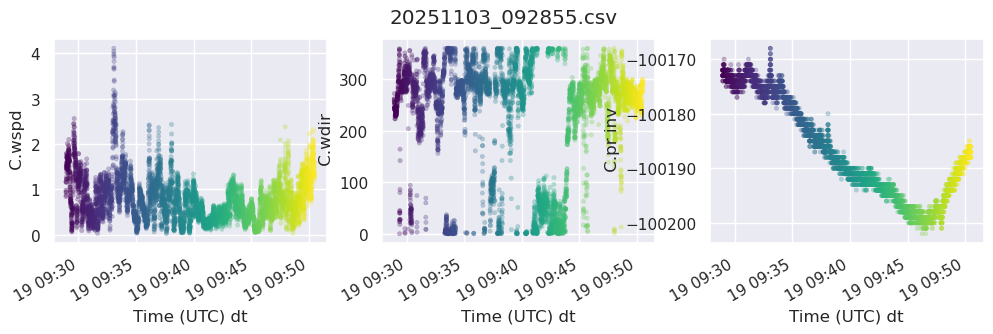

/tmp/ipykernel_197158/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


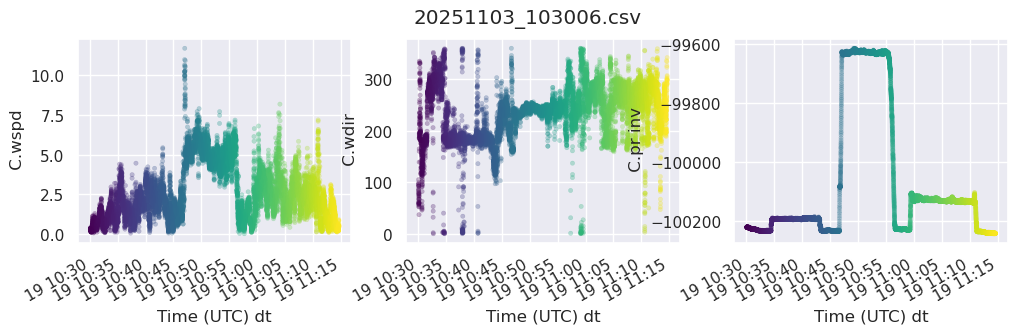

/tmp/ipykernel_197158/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


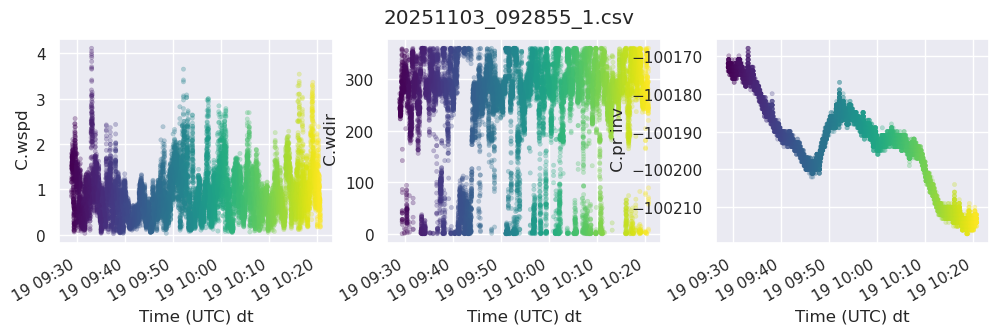

/tmp/ipykernel_197158/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


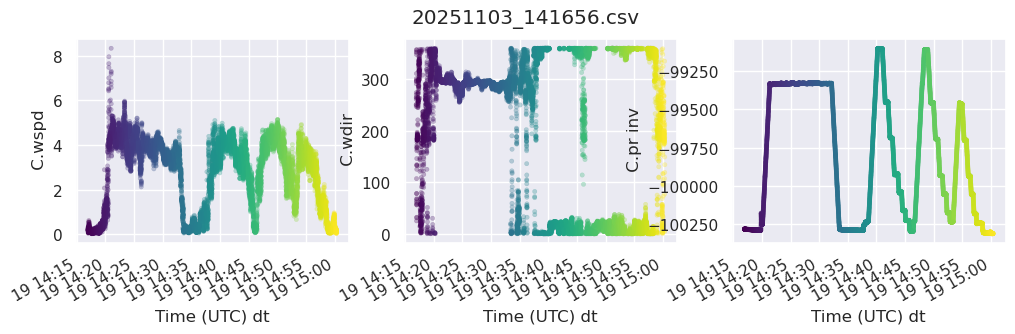

/tmp/ipykernel_197158/1205585465.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])


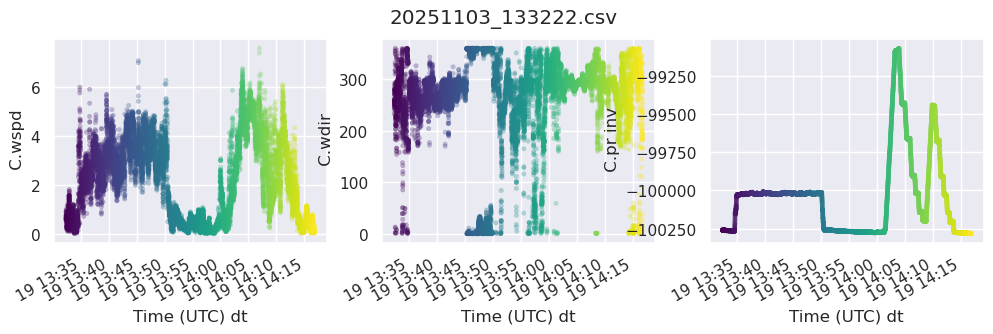

In [6]:
tris_folder = "/indian/UAS_project_data/2025_11_03_Arluno/trisonica"

for tris_file in os.listdir(tris_folder):
    tris_df = pd.read_csv(os.path.join(tris_folder,tris_file),sep=';',header=8)
    
    tris_df['Time (UTC) dt'] = pd.to_datetime(tris_df['Time (UTC)'])
    tris_df[' C.pr inv'] = -tris_df[' C.pr']

    fig,axes=plt.subplots(1,3,figsize=(12,3))
    fig.suptitle(f"{tris_file}")

    sns.scatterplot(
            data=tris_df,
            x='Time (UTC) dt',
            y=' C.wspd',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[0],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
            s=10,    
        )

    sns.scatterplot(
            data=tris_df,
            x='Time (UTC) dt',
            y=' C.wdir',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[1],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
            s=10,    
        )

    sns.scatterplot(
            data=tris_df,
            x='Time (UTC) dt',
            y=' C.pr inv',
            hue='Time (UTC) dt',
            legend=False,
            ax=axes[2],
            edgecolor=None,
            alpha=0.3,
            palette='viridis',
            s=10,    
        )

    fig.autofmt_xdate(rotation=30, ha='right')

    plt.show()